# Assignment 1-3: Softmax

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient


## CIFAR-10 Data Loading and Preprocessing

In [1]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

def get_CIFAR10_data():
    # Load CIFAR-10 data
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Normalize the data (pixel values between 0 and 1)
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # Convert class vectors to binary class matrices (one-hot encoding)
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Optionally, further split into a development set
    X_val, X_dev, y_val, y_dev = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev

# Invoke the function to get our data
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()

# Print shapes for verification
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape: ', X_dev.shape)
print('Development labels shape: ', y_dev.shape)


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

ModuleNotFoundError: No module named 'keras'

In [3]:
print("First 5 images from X_train:\n", X_train[:5])

First 5 images from X_train:
 [[[[0.13333334 0.14117648 0.16862746]
   [0.14509805 0.14509805 0.2       ]
   [0.17254902 0.17254902 0.2509804 ]
   ...
   [0.24313726 0.28627452 0.3647059 ]
   [0.20392157 0.24705882 0.3254902 ]
   [0.1764706  0.22352941 0.3019608 ]]

  [[0.13725491 0.13725491 0.14509805]
   [0.13333334 0.13333334 0.15686275]
   [0.13333334 0.12941177 0.16862746]
   ...
   [0.22745098 0.27058825 0.34901962]
   [0.19607843 0.23529412 0.3137255 ]
   [0.18431373 0.22745098 0.30588236]]

  [[0.13333334 0.12941177 0.13725491]
   [0.12941177 0.1254902  0.14117648]
   [0.12941177 0.1254902  0.14901961]
   ...
   [0.25882354 0.3019608  0.38039216]
   [0.2        0.24313726 0.32156864]
   [0.20784314 0.2509804  0.32941177]]

  ...

  [[0.1254902  0.1254902  0.14901961]
   [0.1254902  0.12156863 0.14509805]
   [0.12941177 0.12941177 0.14901961]
   ...
   [0.16078432 0.14901961 0.1764706 ]
   [0.13333334 0.12156863 0.14901961]
   [0.14117648 0.1254902  0.15686275]]

  [[0.12941177 

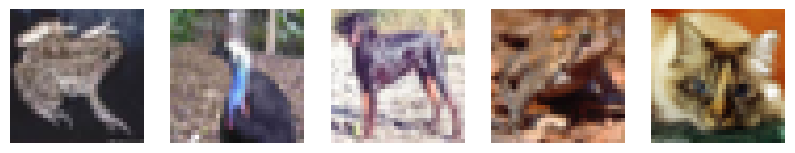

In [4]:
import matplotlib.pyplot as plt


num_images = 5
plt.figure(figsize=(10, 10))

# Plot the first 5 images
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off') 

plt.show()


## Softmax Classifier

Your need to complete `softmax_loss_naive`.


In [14]:
# First implement the naive softmax loss function with nested loops.
# softmax_loss_naive function.

from builtins import range
import numpy as np

def softmax_loss_naive(W, X, y, reg):
    """
    Softmax loss function, naive implementation (with loops)

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)
    
    num_train = X.shape[0]  # Number of training samples (N)
    num_classes = W.shape[1]  # Number of classes (C)

    for i in range(num_train):
        scores = X[i].dot(W)  # Compute the score for each class
        scores -= np.max(scores)  # For numeric stability, subtract max from scores

        # Calculate softmax probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores)

        # Loss: -log of the probability of the correct class
        correct_class_prob = probs[y[i]]
        loss += -np.log(correct_class_prob)

        # Gradient computation
        for j in range(num_classes):
            if j == y[i]:
                dW[:, j] += (probs[j] - 1) * X[i]  # Gradient for correct class
            else:
                dW[:, j] += probs[j] * X[i]  # Gradient for incorrect classes

    # Average the loss and gradients
    loss /= num_train
    dW /= num_train

    # Add regularization to the loss and gradient
    loss += 0.5 * reg * np.sum(W * W)
    dW += reg * W

    return loss, dW

In [15]:
y_dev = y_dev.reshape(-1)


In [16]:
y_dev = y_dev.astype(int)  # Ensure the labels are integers


In [17]:
# Check shape and ensure labels are in correct format
print('Shape of y_dev before:', y_dev.shape)
y_dev = y_dev.reshape(-1).astype(int)
print('Shape of y_dev after:', y_dev.shape)

# Run the softmax loss function
loss, grad = softmax_loss_naive(W, X_dev_flat_with_bias, y_dev, 0.0)

# Print the loss for sanity check
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))


Shape of y_dev before: (50000,)
Shape of y_dev after: (50000,)
loss: 2.301392
sanity check: 2.302585


In [19]:
# Assuming you have a batch of images in shape (N, H, W, C)
# Flatten the images to (N, D) where D = H * W * C
X_dev_flat = X_dev.reshape(X_dev.shape[0], -1)  # This will flatten the last three dimensions
# Add bias term to the flattened input if necessary
X_dev_flat_with_bias = np.hstack([X_dev_flat, np.ones((X_dev_flat.shape[0], 1))])  # shape (N, D+1)


In [20]:
# Generate a random softmax weight matrix
W = np.random.randn(3073, 10) * 0.0001  # Adjust based on your features

# Now run the softmax loss function
loss, grad = softmax_loss_naive(W, X_dev_flat_with_bias, y_dev, 0.0)

# Check loss
print('loss: %f' % loss)


loss: 2.302084


In [21]:
# Assuming W, X_dev, and y_dev are already defined

# Compute the loss and gradient without regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# Print the loss for sanity check
print('Loss without regularization: %f' % loss)

# Numeric gradient checking
from gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# Compute the loss and gradient with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)

# Print the loss for sanity check with regularization
print('Loss with regularization: %f' % loss)

# Numeric gradient checking with regularization
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


ValueError: shapes (32,32,3) and (3073,10) not aligned: 3 (dim 2) != 3073 (dim 0)

In [18]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

ValueError: shapes (32,32,3) and (3073,10) not aligned: 3 (dim 2) != 3073 (dim 0)

In [22]:
import numpy as np

def softmax_loss_vectorized(W, X, y, reg):
    """
    Softmax loss function, vectorized version.

    Inputs and outputs are the same as softmax_loss_naive.
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)

    num_train = X.shape[0]  # Number of training examples
    num_classes = W.shape[1]  # Number of classes

    # Compute scores for all classes
    scores = X.dot(W)  # Shape (N, C)
    scores -= np.max(scores, axis=1, keepdims=True)  # Numeric stability

    # Compute softmax probabilities
    exp_scores = np.exp(scores)  # Shape (N, C)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Shape (N, C)

    # Compute the loss: average over the batch and add regularization
    loss = -np.sum(np.log(probs[np.arange(num_train), y])) / num_train  # Shape (1,)
    loss += reg * np.sum(W * W)  # Regularization loss

    # Compute the gradient
    dW = X.T.dot(probs)  # Shape (D, C)
    # Subtract the gradient for the correct classes
    dW[np.arange(W.shape[0]), y] -= X.T.dot(np.ones(num_train))  # Shape (D, C)
    dW /= num_train  # Average over the batch
    dW += 2 * reg * W  # Regularization gradient

    return loss, dW


In [25]:
import numpy as np
import time


tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

# Compute the loss and gradient using the vectorized implementation
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# Compare the results using Frobenius norm for the gradient
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

ValueError: shapes (32,32,3) and (3073,10) not aligned: 3 (dim 2) != 3073 (dim 0)

### Discussion